In [3]:
import numpy as np
import pandas as pd

In [27]:
data = pd.read_csv('../../mlcourse_open/data/bikes_rent.csv')

In [5]:
data.shape

(731, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


In [7]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [8]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872077,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)

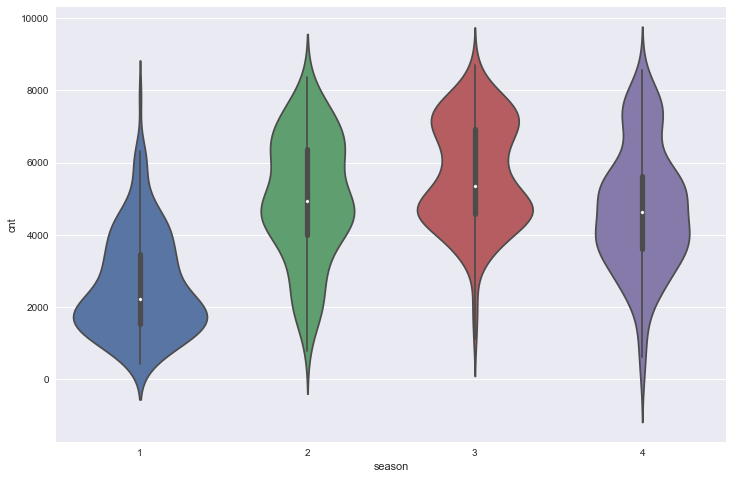

In [10]:
sns.violinplot(data['season'], data['cnt']);

In [11]:
#Ваш код здесь

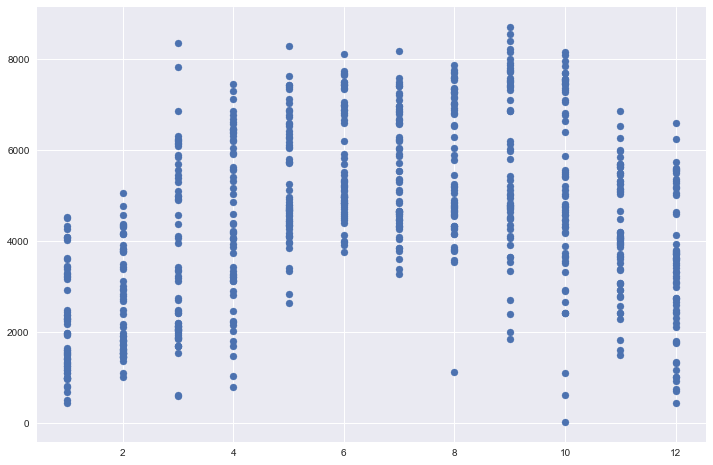

In [14]:
plt.scatter(data['mnth'], data['cnt']);

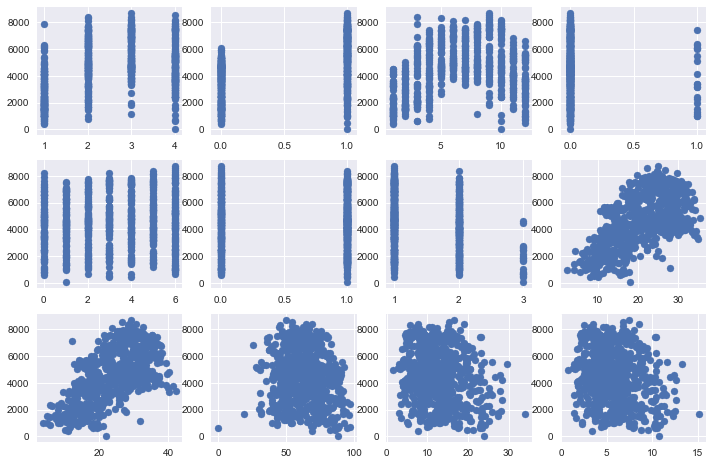

In [17]:
for i, col in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 4, i)
    plt.scatter(data[col], data['cnt'])

In [18]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [19]:
linreg = LinearRegression(normalize=True)

Здесь упорядоченная выборка по времени, поэтому следует соблюдать последовательность (прогнозоировать по прошлому будущее)

In [20]:
train_size = int(data.shape[0] * 0.7)

In [28]:
X, y = data.drop('cnt', axis=1).values, data['cnt'].values

In [26]:
#X, y = data.pop('cnt', axis=1).values, data['cnt'].values

In [30]:
X_train, y_train = X[:train_size, :], y[:train_size]
X_valid, y_valid = X[train_size:, :], y[train_size:]

In [31]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [33]:
linreg.score(X_train, y_train)

0.77872150205103452

In [34]:
linreg.score(X_valid, y_valid)

0.53853368127531331

In [58]:
mean_squared_error(y_train, linreg.predict(X_train))

555726.42860035703

In [54]:
mean_squared_error(y_valid, linreg.predict(X_valid))

1258424.1858119068

In [59]:
import numpy as np

In [60]:
np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid)))

1121.7950730021535

In [36]:
lasso = Lasso(normalize = True, random_state=17).fit(X_train, y_train)

In [39]:
lasso.score(X_train, y_train), lasso.score(X_valid, y_valid)

(0.7767997093491088, 0.53435165381704031)

In [55]:
mean_squared_error(y_valid, lasso.predict(X_valid))

1269828.6248482473

In [61]:
np.sqrt(mean_squared_error(y_valid, lasso.predict(X_valid)))

1126.8667289649861

In [41]:
lasso_cv = LassoCV(random_state=17, cv=5, normalize=True).fit(X_train, y_train)

In [42]:
lasso_cv.alphas_

array([  4.42670664e+01,   4.12836143e+01,   3.85012368e+01,
         3.59063823e+01,   3.34864123e+01,   3.12295402e+01,
         2.91247737e+01,   2.71618615e+01,   2.53312429e+01,
         2.36240019e+01,   2.20318233e+01,   2.05469521e+01,
         1.91621563e+01,   1.78706911e+01,   1.66662663e+01,
         1.55430158e+01,   1.44954685e+01,   1.35185225e+01,
         1.26074193e+01,   1.17577214e+01,   1.09652903e+01,
         1.02262665e+01,   9.53705034e+00,   8.89428507e+00,
         8.29484003e+00,   7.73579557e+00,   7.21442884e+00,
         6.72820048e+00,   6.27474229e+00,   5.85184566e+00,
         5.45745085e+00,   5.08963692e+00,   4.74661243e+00,
         4.42670664e+00,   4.12836143e+00,   3.85012368e+00,
         3.59063823e+00,   3.34864123e+00,   3.12295402e+00,
         2.91247737e+00,   2.71618615e+00,   2.53312429e+00,
         2.36240019e+00,   2.20318233e+00,   2.05469521e+00,
         1.91621563e+00,   1.78706911e+00,   1.66662663e+00,
         1.55430158e+00,

In [43]:
lasso_cv.alpha_

0.1022626647933807

In [44]:
linreg.coef_

array([  3.73738088e+02,   2.11192624e+03,   9.01121609e+00,
        -4.13959673e+02,   5.18558458e+01,   3.17019995e+01,
        -5.29200073e+02,   8.53794468e+00,   1.11377053e+02,
        -1.04375015e+01,  -5.80562222e+11,   1.29871769e+12])

In [46]:
import pandas as pd
def print_coef(feature_names, coef):
    return pd.DataFrame(coef, index=feature_names,
                       columns=['coef']).sort_values(by='coef', ascending=False)

In [47]:
print_coef(data.columns[:-1], linreg.coef_)

,coef
windspeed(ms),1.298718e+12
yr,2.111926e+03
season,3.737381e+02
atemp,1.113771e+02
weekday,5.185585e+01
workingday,3.170200e+01
mnth,9.011216e+00
temp,8.537945e+00
hum,-1.043750e+01
holiday,-4.139597e+02


In [48]:
print_coef(data.columns[:-1], lasso.coef_)

,coef
yr,2020.517017
season,362.520987
atemp,117.432310
weekday,42.037085
mnth,0.081720
workingday,0.000000
temp,0.000000
windspeed(ms),-0.000000
hum,-8.184440
windspeed(mph),-31.002820


Полученную таблицу можно уже интерпретировать как значимость признаков

Проверить на ridge

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
forest = RandomForestRegressor(random_state=17).fit(X_train, y_train)

In [53]:
forest.score(X_valid,y_valid)

0.5643538555754517

In [56]:
mean_squared_error(y_valid, forest.predict(X_valid))

1188012.2608181816

In [62]:
np.sqrt(mean_squared_error(y_valid, forest.predict(X_valid)))

1089.9597519258139

In [63]:
ridge_cv = RidgeCV(normalize=True).fit(X_train, y_train)

In [64]:
np.sqrt(mean_squared_error(y_valid, ridge_cv.predict(X_valid)))

1138.3433960791338

Лес победил (чем меньше, тем лучше)